## Análisis de dataset Titanic

### 1.1 Análisis de Estructura y Calidad

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")
palette = sns.color_palette('deep')  # Paleta por defecto con azul, naranja, verde, rojo...
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Cargar el dataset
df = pd.read_csv('../data/Titanic-Dataset-Canvas.csv')

print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Dimensiones: {df.shape}")
print(f"Número de pasajeros: {len(df)}")
print("\nPrimeras 5 filas:")
df.head(12)

=== INFORMACIÓN GENERAL DEL DATASET ===
Dimensiones: (891, 12)
Número de pasajeros: 891

Primeras 5 filas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


=== ANÁLISIS DE VALORES FALTANTES ===
          Valores Faltantes  Porcentaje
Cabin                   687   77.104377
Age                     177   19.865320
Embarked                  2    0.224467


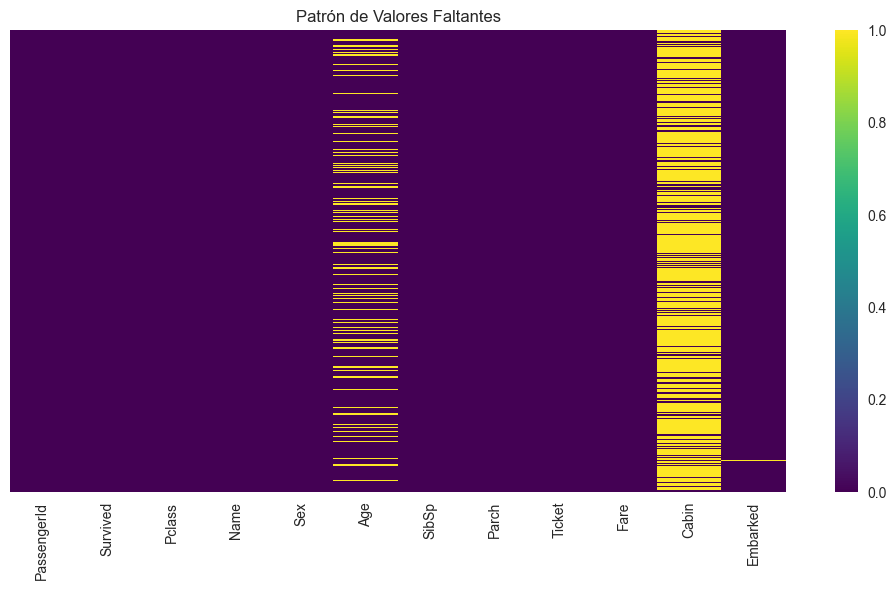

In [4]:
  # Análisis de variables faltantes
  print("=== ANÁLISIS DE VALORES FALTANTES ===")
  missing_data = df.isnull().sum()
  missing_percent = (missing_data / len(df)) * 100

  missing_df = pd.DataFrame({
      'Valores Faltantes': missing_data,
      'Porcentaje': missing_percent
  }).sort_values('Porcentaje', ascending=False)

  print(missing_df[missing_df['Valores Faltantes'] > 0])

  # Visualización de valores faltantes
  plt.figure(figsize=(10, 6))
  sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
  plt.title('Patrón de Valores Faltantes')
  plt.tight_layout()
  plt.show()

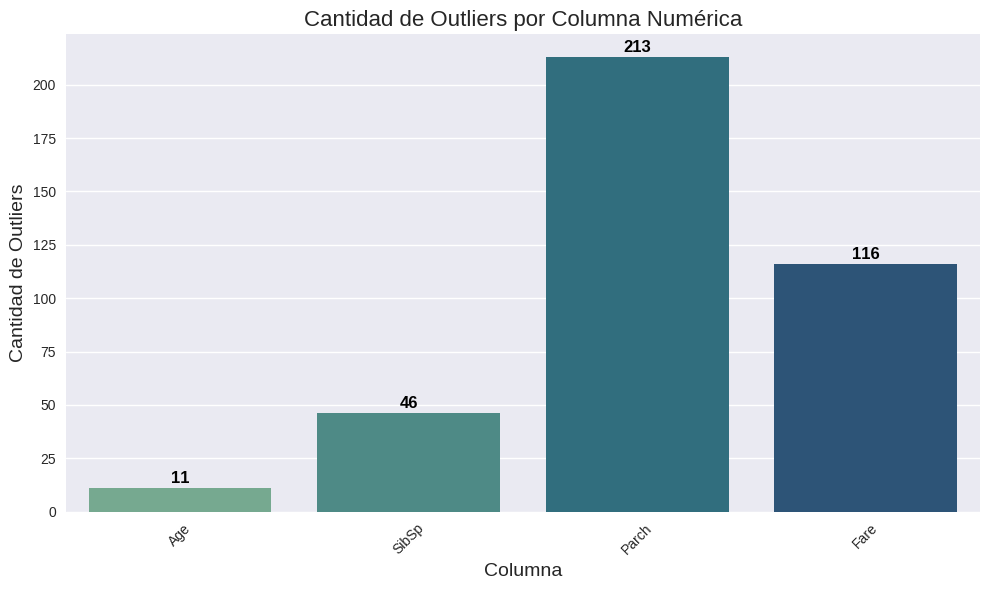

In [ ]:
# Detectar outliers por columna numérica
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)].shape[0]

# Convertir a DataFrame para graficar
outliers_df = pd.DataFrame(list(outliers.items()), columns=['Columna', 'Cantidad'])
outliers_df = outliers_df[outliers_df['Cantidad'] > 0]

# Crear gráfica de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=outliers_df, x='Columna', y='Cantidad', hue='Columna', palette='crest', dodge=False)

# Agregar etiquetas con el número de outliers encima de cada barra
for i, bar in enumerate(barplot.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    count = int(y)
    plt.text(x, y + 1, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Personalizar gráfico
plt.title('Cantidad de Outliers por Columna Numérica', fontsize=16)
plt.xlabel('Columna', fontsize=14)
plt.ylabel('Cantidad de Outliers', fontsize=14)
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

### 1.2 Estadística Descriptiva

In [ ]:
# Estadísticas descriptivas
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
print("\nVariables numéricas:")
print(df.describe())

print("\nVariables categóricas:")
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())

=== ESTADÍSTICAS DESCRIPTIVAS ===

Variables numéricas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Variables categóricas:



Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


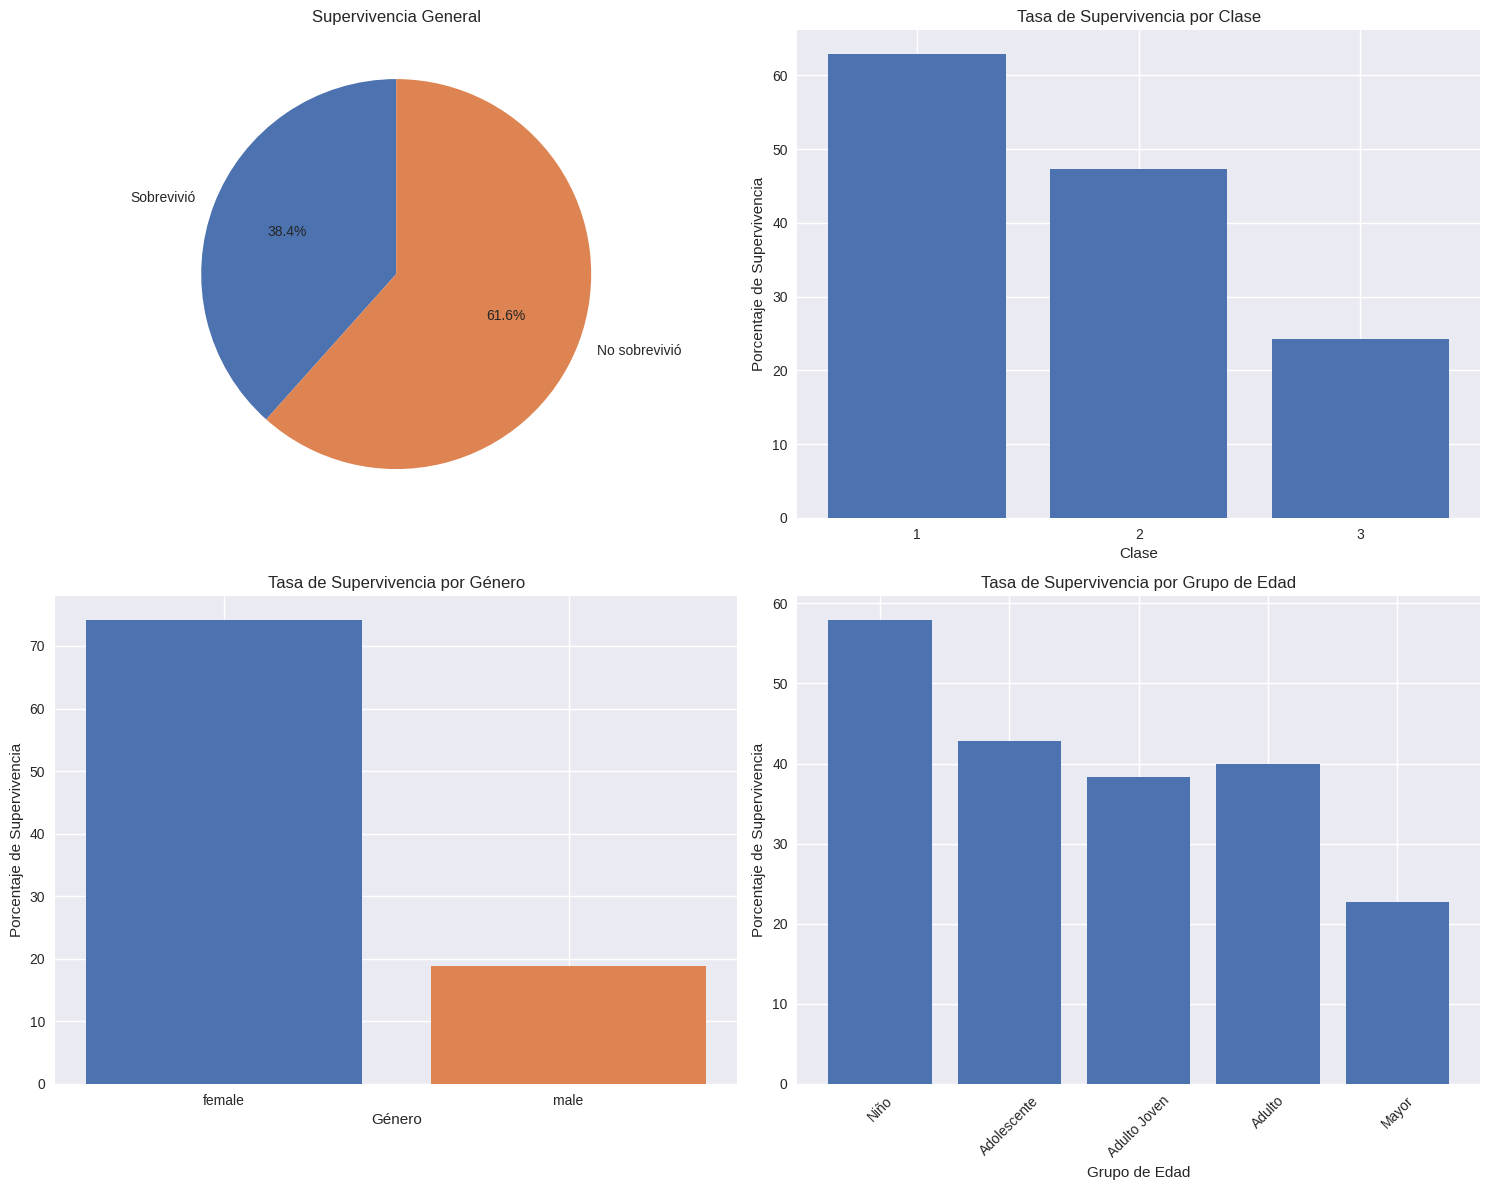

In [ ]:
# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Supervivencia general (pastel no necesita color personalizado)
axes[0,0].pie([df['Survived'].sum(), len(df) - df['Survived'].sum()],
              labels=['Sobrevivió', 'No sobrevivió'],
              autopct='%1.1f%%', startangle=90)  # Azul y naranja
axes[0,0].set_title('Supervivencia General')

# Supervivencia por clase
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_class)
axes[0,1].bar(survival_by_class.index, survival_by_class.values)
axes[0,1].set_title('Tasa de Supervivencia por Clase')
axes[0,1].set_xlabel('Clase')
axes[0,1].set_ylabel('Porcentaje de Supervivencia')
axes[0,1].set_xticks([1, 2, 3])

# Supervivencia por género
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print(survival_by_sex)
axes[1,0].bar(survival_by_sex.index, survival_by_sex.values, color=palette[:2])
axes[1,0].set_title('Tasa de Supervivencia por Género')
axes[1,0].set_xlabel('Género')
axes[1,0].set_ylabel('Porcentaje de Supervivencia')

# Supervivencia por grupo de edad
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                         labels=['Niño', 'Adolescente', 'Adulto Joven', 'Adulto', 'Mayor'])
survival_by_age = df.groupby('Age_Group')['Survived'].mean() * 100
axes[1,1].bar(survival_by_age.index.astype(str), survival_by_age.values)
axes[1,1].set_title('Tasa de Supervivencia por Grupo de Edad')
axes[1,1].set_xlabel('Grupo de Edad')
axes[1,1].set_ylabel('Porcentaje de Supervivencia')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### 1.3 Visualización Univariada

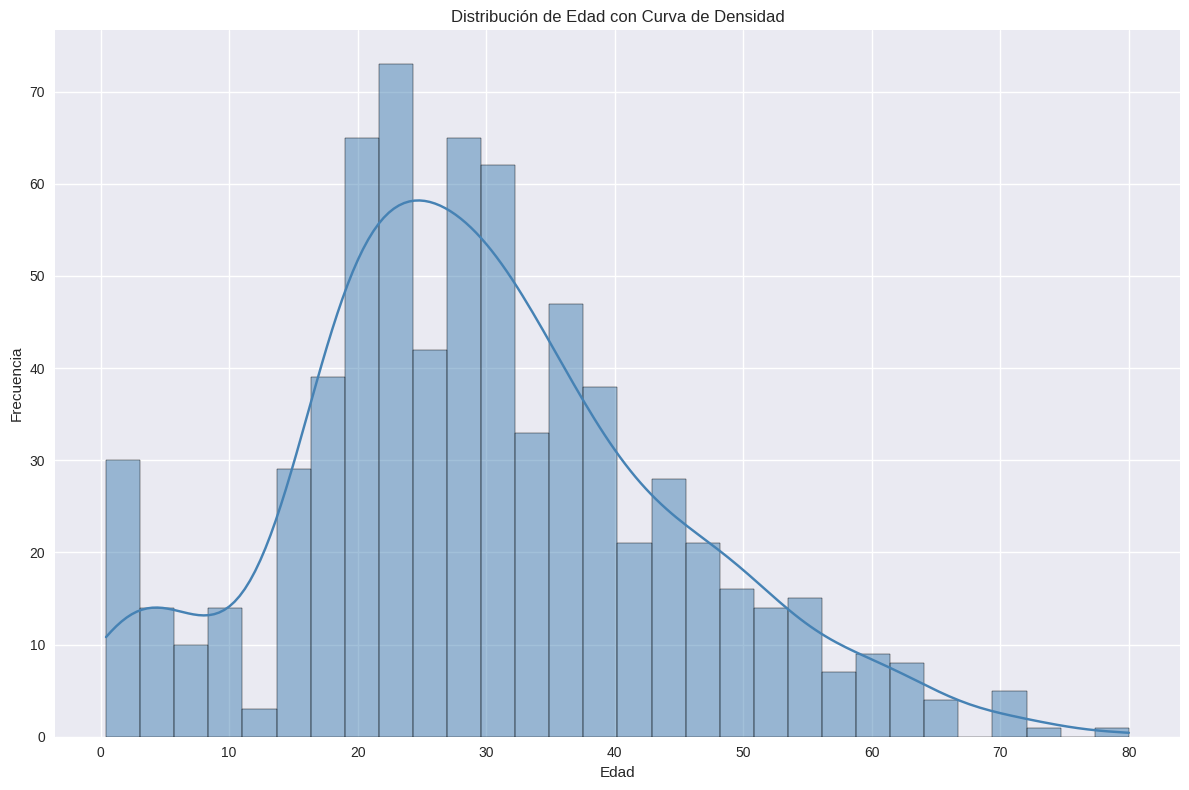

In [ ]:
#Distribución de edad
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='steelblue')
plt.title('Distribución de Edad con Curva de Densidad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

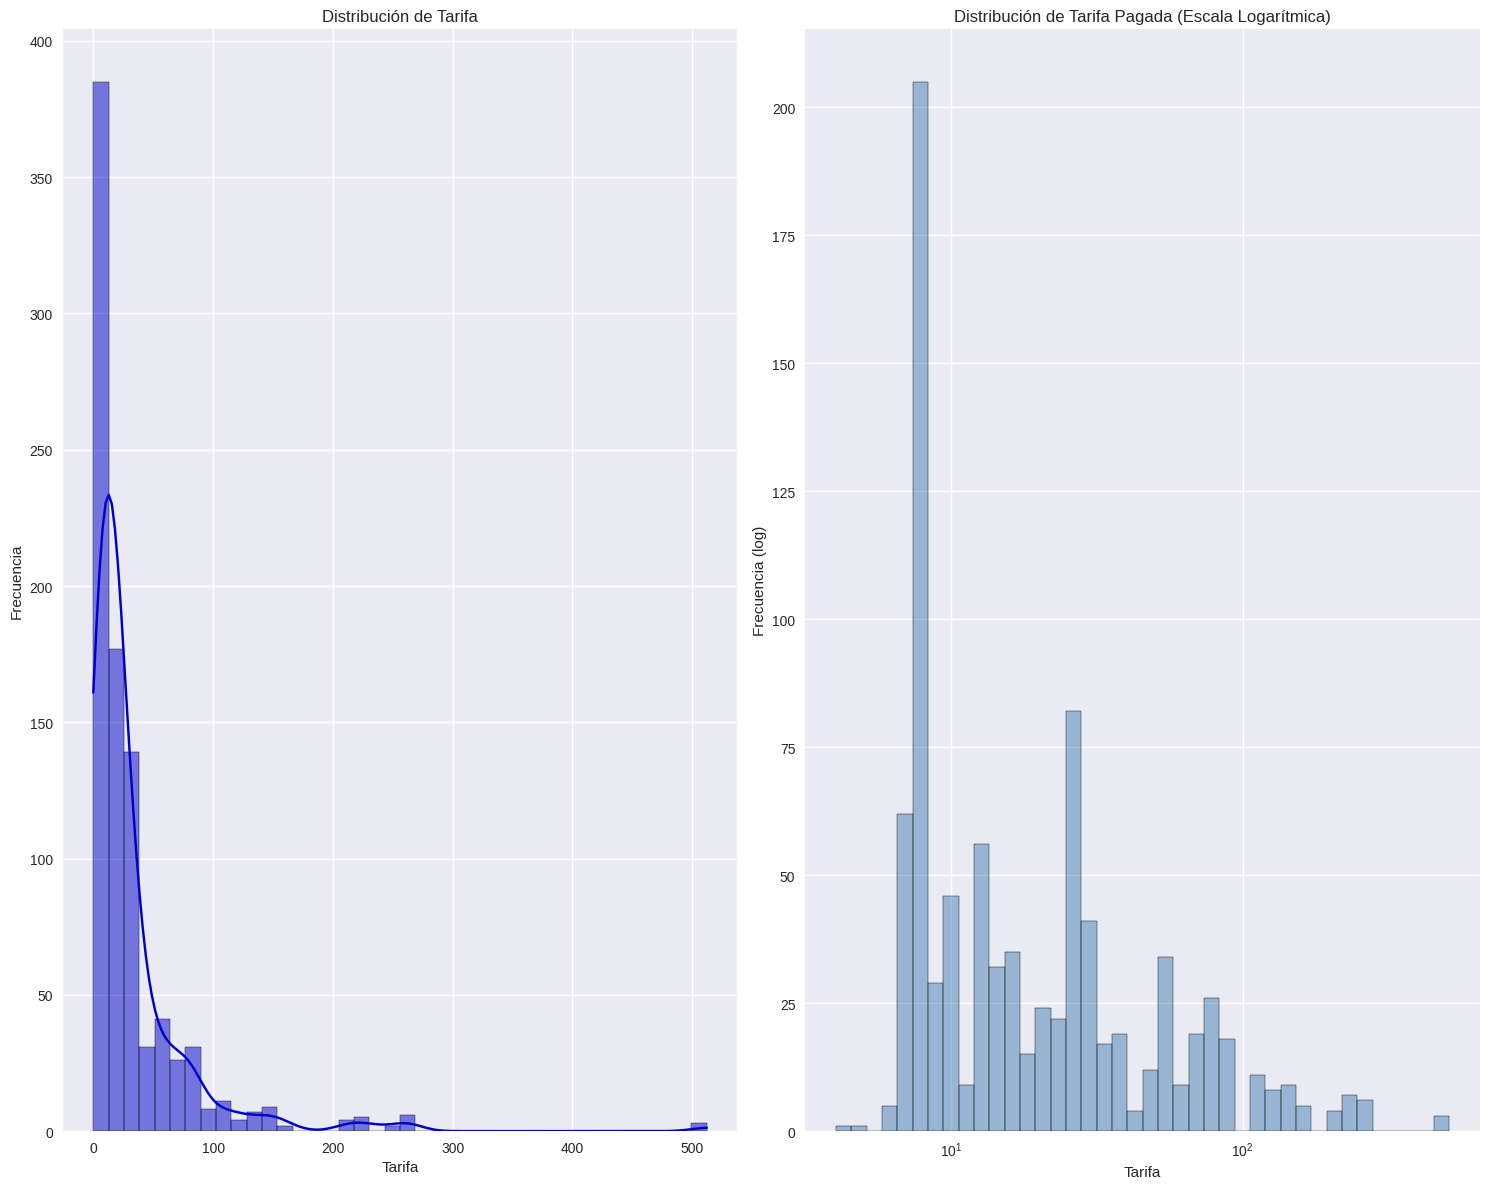

In [ ]:
#Distribución de tarifa pagada

fig, axes = plt.subplots(1, 2, figsize=(15, 12))

sns.histplot(df['Fare'], bins=40, kde=True, ax=axes[0], color='mediumblue')
axes[0].set_title('Distribución de Tarifa')
axes[0].set_xlabel('Tarifa')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df['Fare'], bins=40, kde=True, log_scale=True, ax=axes[1], color='steelblue')
axes[1].set_title('Distribución de Tarifa Pagada (Escala Logarítmica)')
axes[1].set_xlabel('Tarifa')
axes[1].set_ylabel('Frecuencia (log)')

plt.tight_layout()
plt.show()

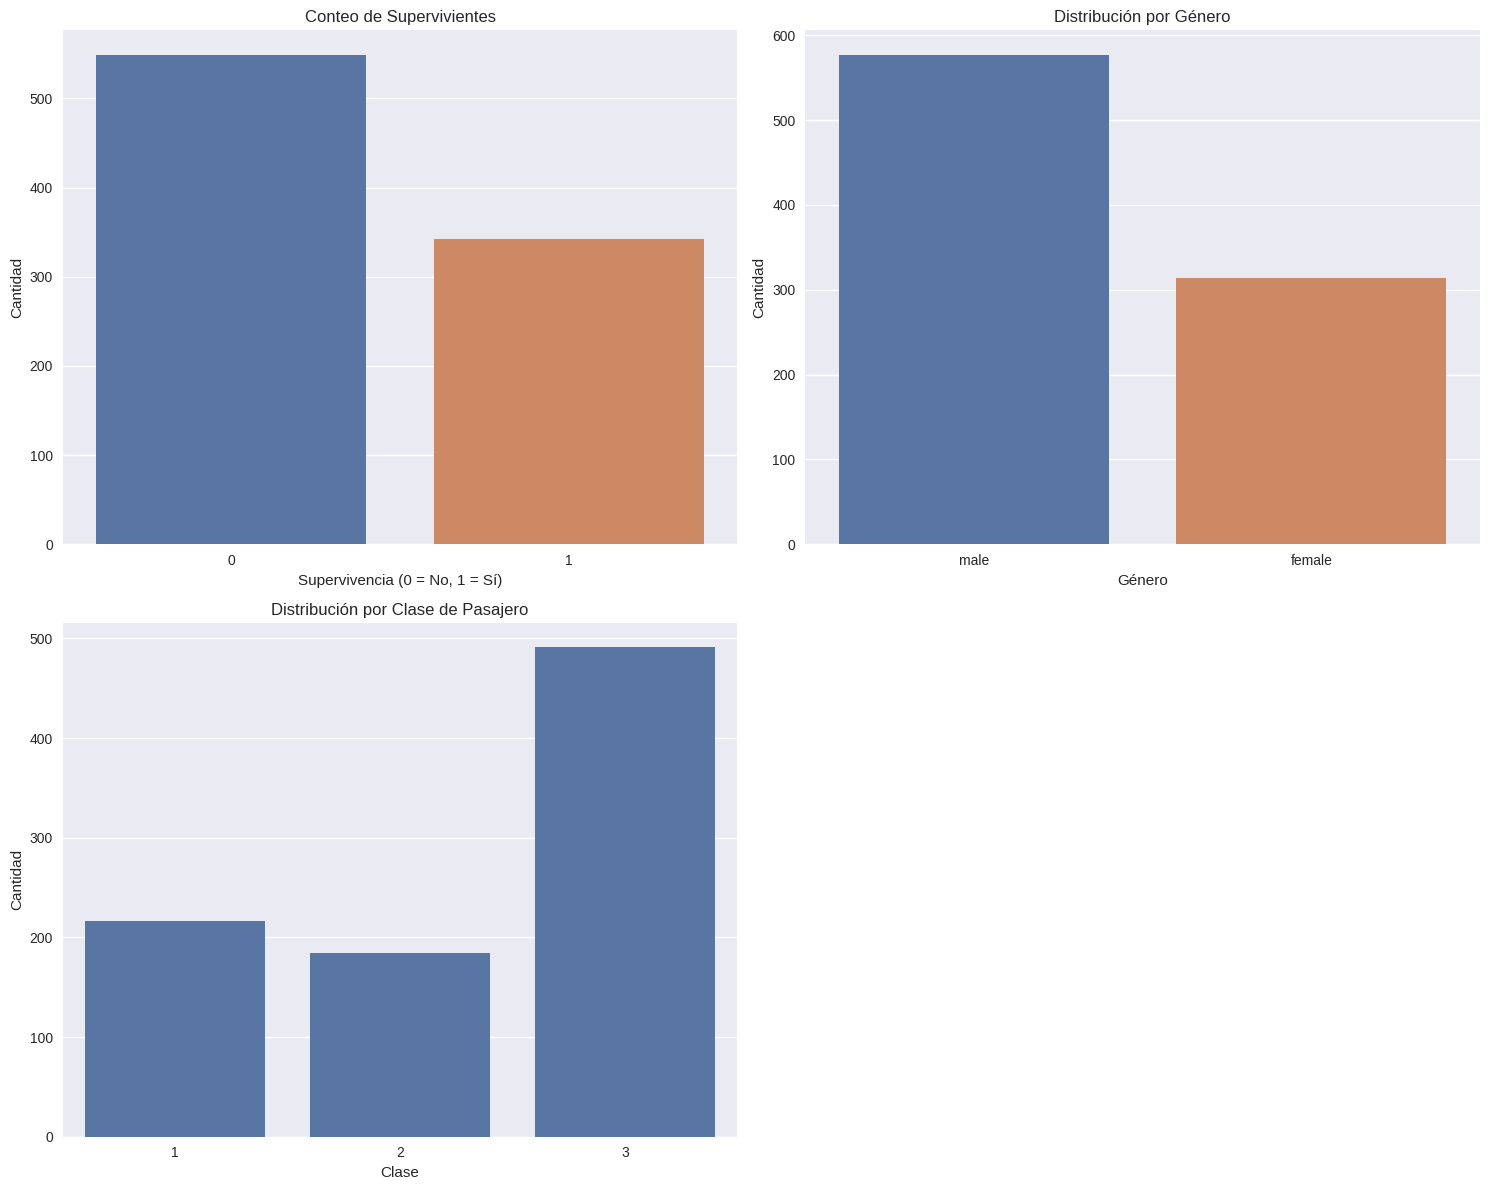

In [ ]:
#Gráficos de barras para variables categóricas

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.countplot(x='Survived', data=df, ax=axes[0,0], palette=palette[:2])
axes[0,0].set_title('Conteo de Supervivientes')
axes[0,0].set_xlabel('Supervivencia (0 = No, 1 = Sí)')
axes[0,0].set_ylabel('Cantidad')

sns.countplot(x='Sex', data=df, ax=axes[0,1], palette=palette[:2])
axes[0,1].set_title('Distribución por Género')
axes[0,1].set_xlabel('Género')
axes[0,1].set_ylabel('Cantidad')

sns.countplot(x='Pclass', data=df, ax=axes[1,0])
axes[1,0].set_title('Distribución por Clase de Pasajero')
axes[1,0].set_xlabel('Clase')
axes[1,0].set_ylabel('Cantidad')

# Ocultar el subplot vacío (abajo derecha)
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

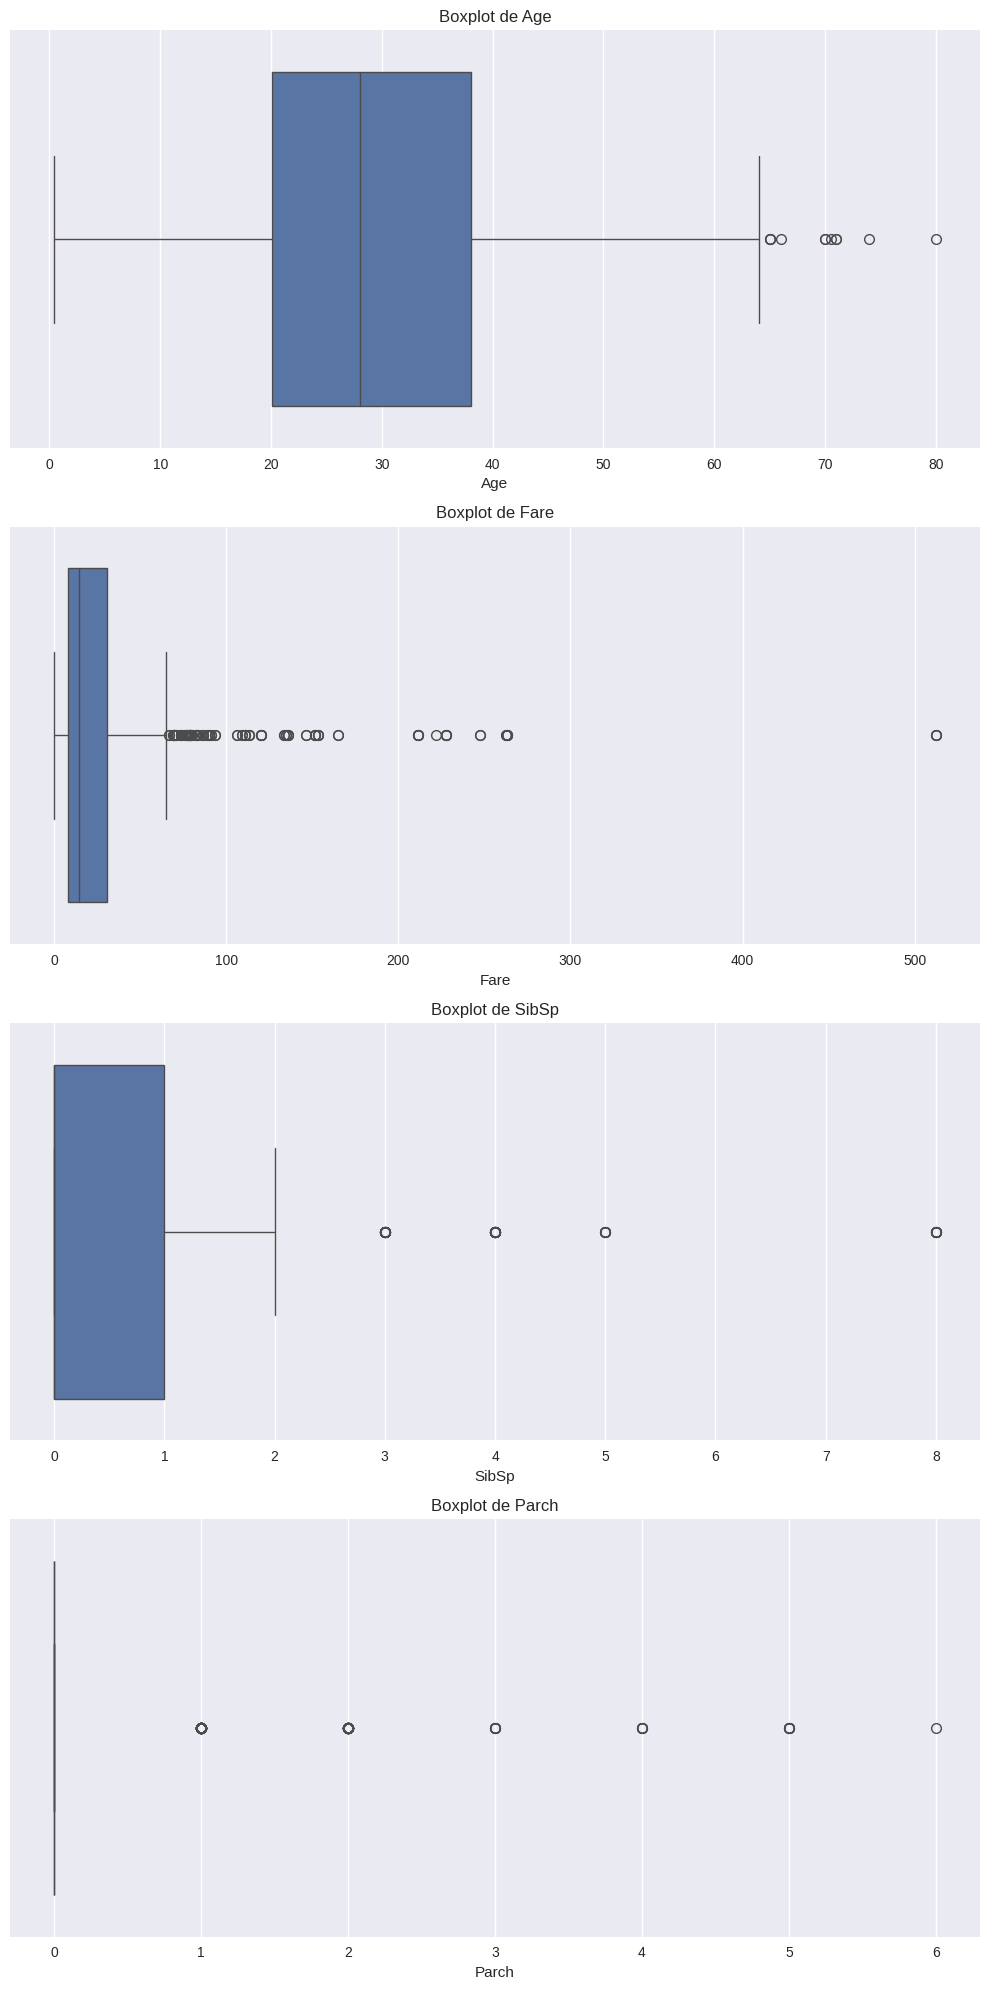

In [ ]:
#Box plots para identificar outliers
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(10, 5 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### 1.4 Análisis Bivariado y Multivariado

In [ ]:
# Preparación de datos para análisis
# Crear variables adicionales útiles
df['Age_Group'] = pd.cut(df['Age'],
                        bins=[0, 12, 18, 35, 60, 100],
                        labels=['Niño', 'Adolescente', 'Adulto Joven', 'Adulto', 'Mayor'])

df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Is_Alone'] = (df['Family_Size'] == 1).astype(int)

# Crear variable de título del nombre
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',
                                  'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

print("Nuevas variables creadas:")
print("- Age_Group: Grupos de edad")
print("- Family_Size: Tamaño de familia")
print("- Is_Alone: Si viaja solo")
print("- Title: Título extraído del nombre")

Nuevas variables creadas:
- Age_Group: Grupos de edad
- Family_Size: Tamaño de familia
- Is_Alone: Si viaja solo
- Title: Título extraído del nombre


=== ANÁLISIS GÉNERO X CLASE ===
Porcentaje de supervivencia por Género y Clase:
Survived               0          1
Sex    Pclass                      
female 1        3.191489  96.808511
       2        7.894737  92.105263
       3       50.000000  50.000000
male   1       63.114754  36.885246
       2       84.259259  15.740741
       3       86.455331  13.544669


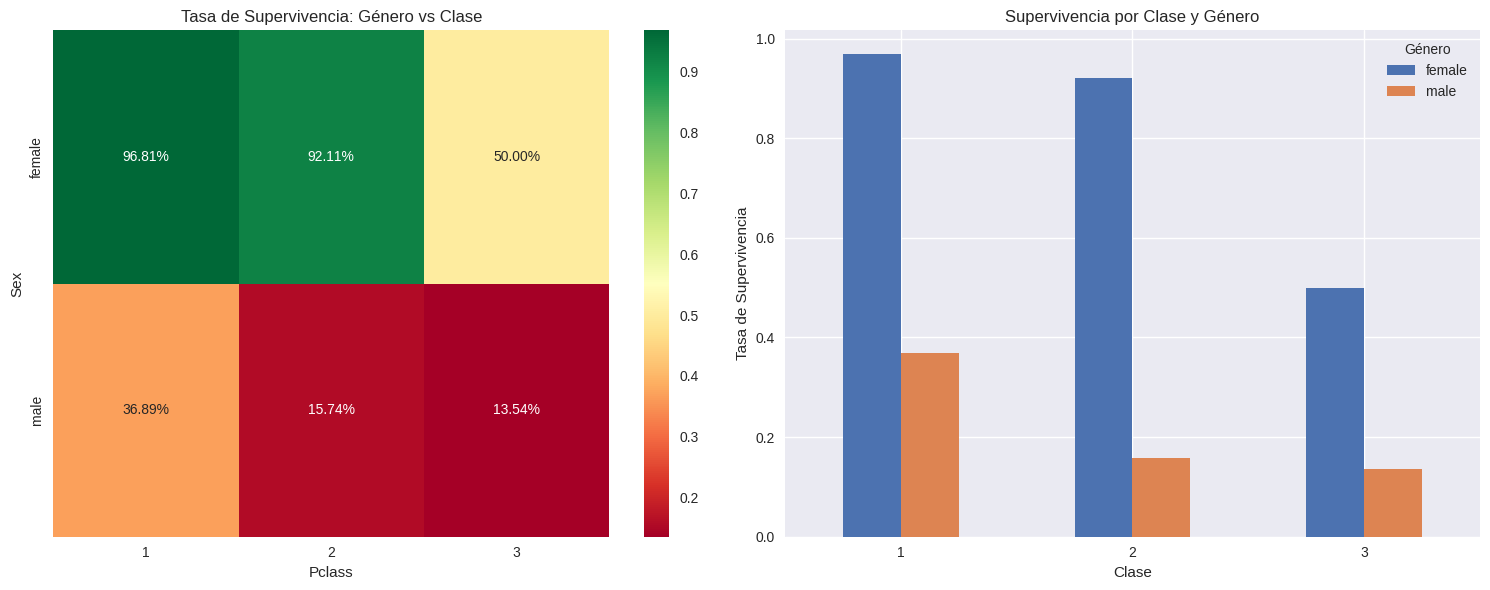

In [ ]:
# ANÁLISIS DETALLADO: GÉNERO Y CLASE
print("=== ANÁLISIS GÉNERO X CLASE ===")

# Crear tabla cruzada
gender_class_survival = pd.crosstab([df['Sex'], df['Pclass']], df['Survived'], margins=True)
gender_class_percent = pd.crosstab([df['Sex'], df['Pclass']], df['Survived'], normalize='index') * 100

print("Porcentaje de supervivencia por Género y Clase:")
print(gender_class_percent)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap de supervivencia
pivot_table = df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.2%', cmap='RdYlGn', ax=axes[0])
axes[0].set_title('Tasa de Supervivencia: Género vs Clase')

# Gráfico de barras agrupadas
df_grouped = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
df_grouped.plot(kind='bar', ax=axes[1])
axes[1].set_title('Supervivencia por Clase y Género')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Tasa de Supervivencia')
axes[1].legend(title='Género')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

=== ANÁLISIS POR EDAD ===
Supervivencia por grupo de edad:
              count  sum      mean  percentage
Age_Group                                     
Niño             69   40  0.579710   57.971014
Adolescente      70   30  0.428571   42.857143
Adulto Joven    358  137  0.382682   38.268156
Adulto          195   78  0.400000   40.000000
Mayor            22    5  0.227273   22.727273


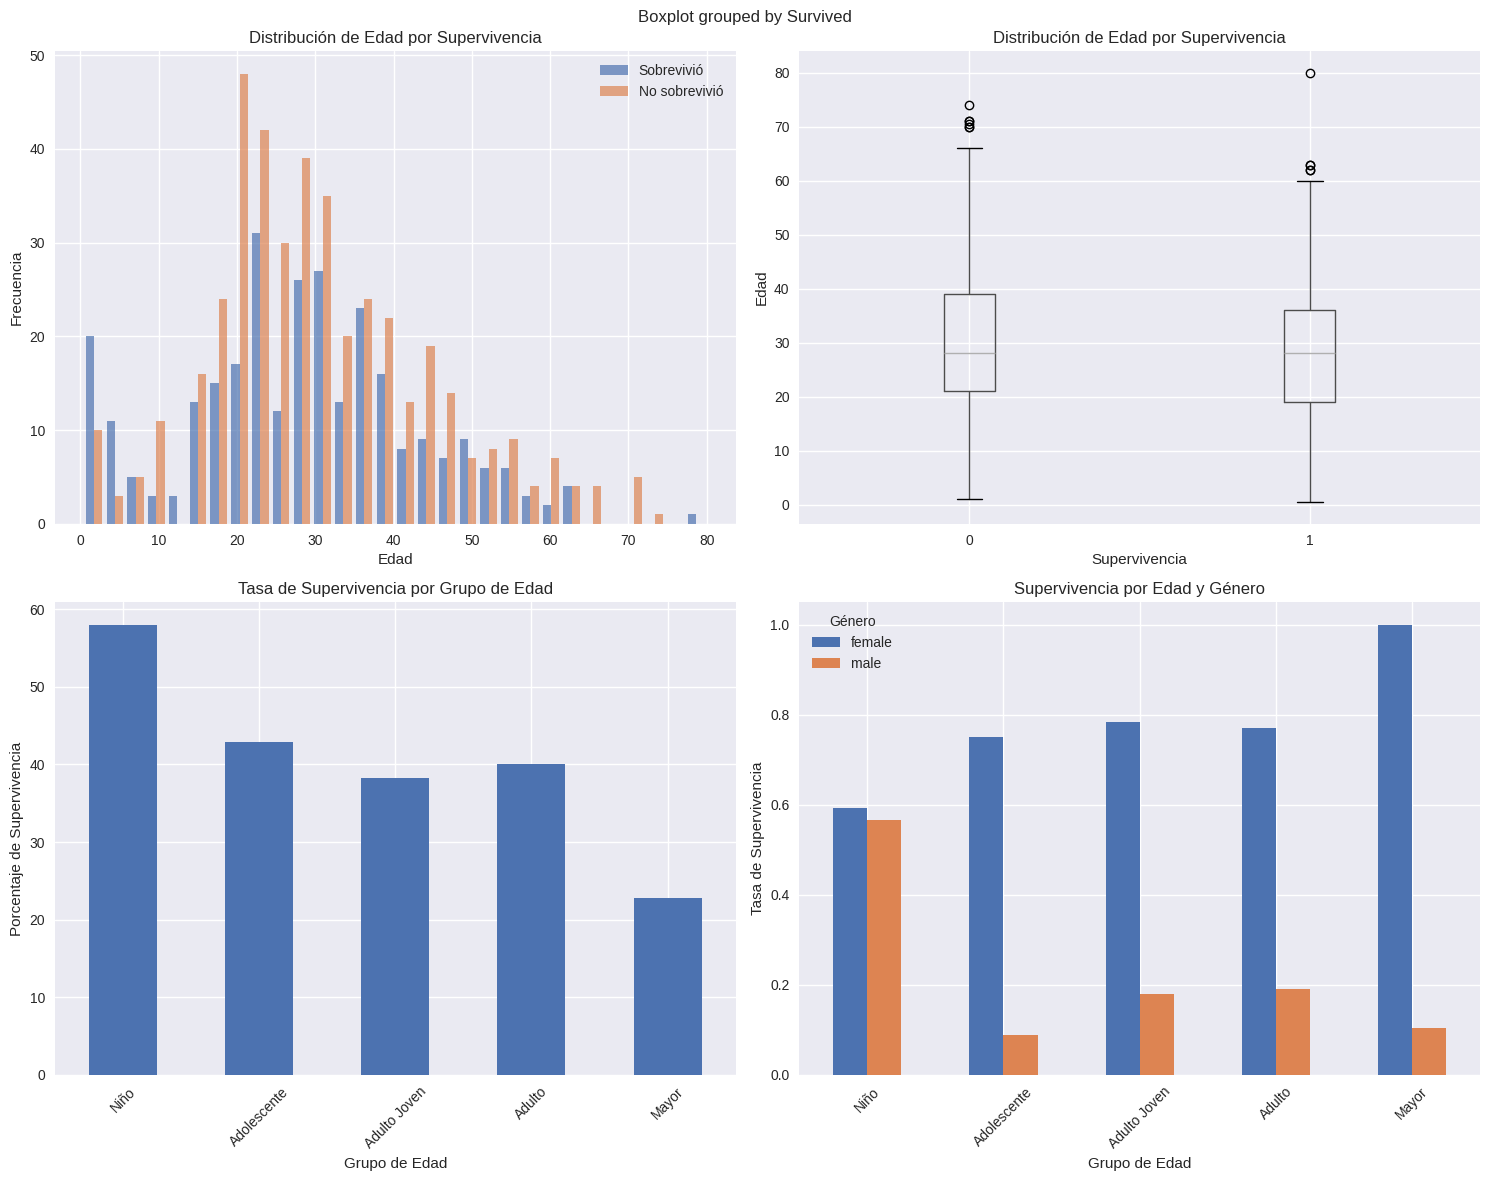

In [ ]:
# ANÁLISIS POR EDAD
print("=== ANÁLISIS POR EDAD ===")

# Supervivencia por grupos de edad
age_survival = df.groupby('Age_Group')['Survived'].agg(['count', 'sum', 'mean'])
age_survival['percentage'] = age_survival['mean'] * 100

print("Supervivencia por grupo de edad:")
print(age_survival)

# Distribución de edad por supervivencia
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histograma de edad por supervivencia
survived = df[df['Survived'] == 1]['Age'].dropna()
not_survived = df[df['Survived'] == 0]['Age'].dropna()

axes[0,0].hist([survived, not_survived], bins=30, label=['Sobrevivió', 'No sobrevivió'], alpha=0.7)
axes[0,0].set_title('Distribución de Edad por Supervivencia')
axes[0,0].set_xlabel('Edad')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].legend()

# Box plot de edad por supervivencia
df.boxplot(column='Age', by='Survived', ax=axes[0,1])
axes[0,1].set_title('Distribución de Edad por Supervivencia')
axes[0,1].set_xlabel('Supervivencia')
axes[0,1].set_ylabel('Edad')

# Supervivencia por grupo de edad
age_survival['percentage'].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Tasa de Supervivencia por Grupo de Edad')
axes[1,0].set_xlabel('Grupo de Edad')
axes[1,0].set_ylabel('Porcentaje de Supervivencia')
axes[1,0].tick_params(axis='x', rotation=45)

# Supervivencia por edad y género
age_gender_survival = df.groupby(['Age_Group', 'Sex'])['Survived'].mean().unstack()
age_gender_survival.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Supervivencia por Edad y Género')
axes[1,1].set_xlabel('Grupo de Edad')
axes[1,1].set_ylabel('Tasa de Supervivencia')
axes[1,1].legend(title='Género')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

=== MATRIZ DE CORRELACIÓN ===


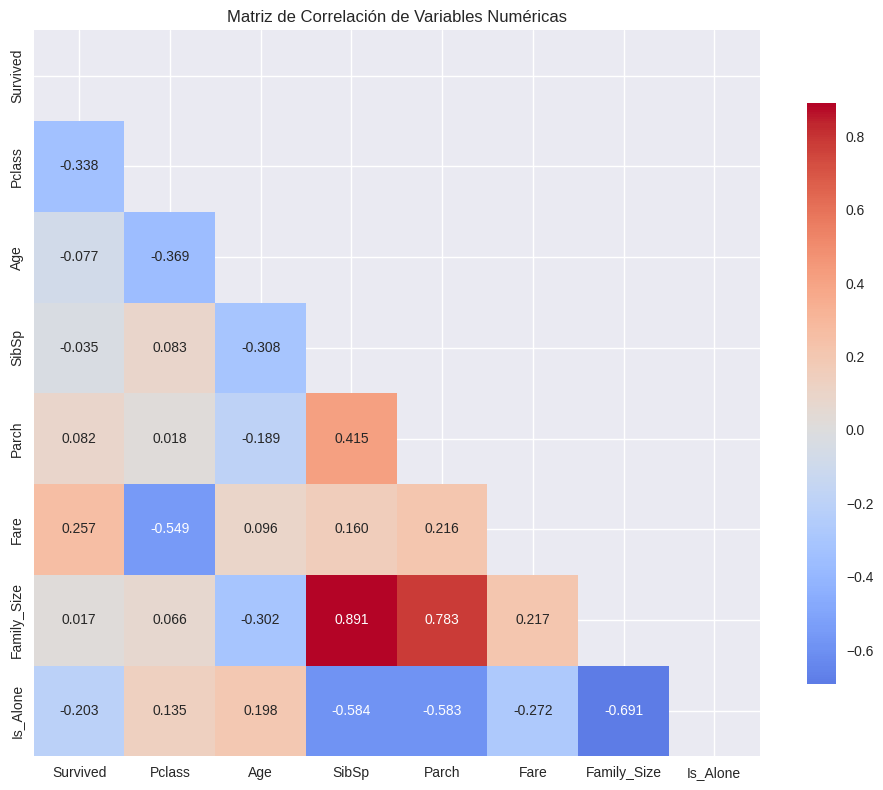

Correlaciones más fuertes con Supervivencia:
Pclass         0.338481
Fare           0.257307
Is_Alone       0.203367
Parch          0.081629
Age            0.077221
SibSp          0.035322
Family_Size    0.016639
Name: Survived, dtype: float64


In [ ]:
# MATRIZ DE CORRELACIÓN
print("=== MATRIZ DE CORRELACIÓN ===")

# Seleccionar variables numéricas para correlación
numeric_vars = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Is_Alone']
correlation_data = df[numeric_vars].copy()

# Calcular matriz de correlación
correlation_matrix = correlation_data.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

print("Correlaciones más fuertes con Supervivencia:")
survival_corr = correlation_matrix['Survived'].abs().sort_values(ascending=False)
print(survival_corr[1:])  # Excluir la correlación de supervivencia consigo misma

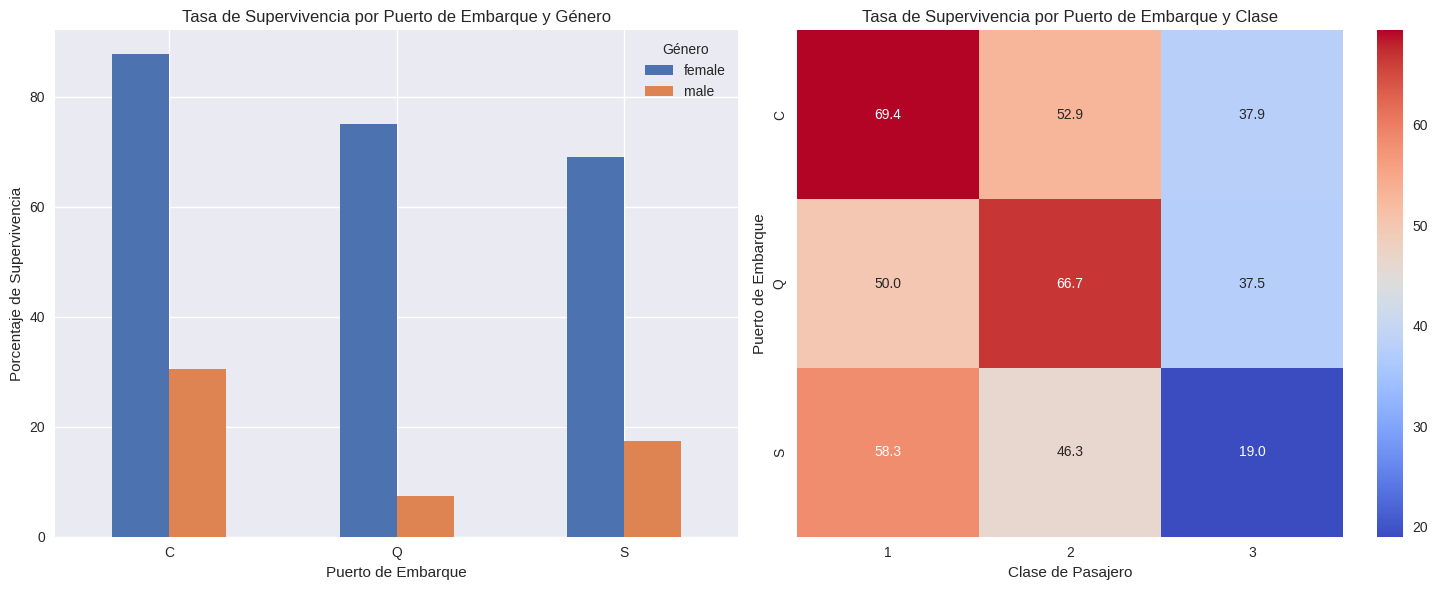

In [ ]:
# SUPERVIVENCIA POR PUERTO DE EMBARQUE
# Agrupación por puerto y género
embarked_gender_survival = df.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack()

# Multiplicar por 100 para obtener porcentaje
embarked_gender_survival *= 100

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras agrupadas
embarked_gender_survival.plot(kind='bar', ax=axes[0])
axes[0].set_title('Tasa de Supervivencia por Puerto de Embarque y Género')
axes[0].set_xlabel('Puerto de Embarque')
axes[0].set_ylabel('Porcentaje de Supervivencia')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Género')

# Crear tabla dinámica: promedio de supervivencia por puerto y clase
embark_class_survival = df.groupby(['Embarked', 'Pclass'])['Survived'].mean().unstack() * 100

# Visualizar como heatmap
sns.heatmap(embark_class_survival, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Tasa de Supervivencia por Puerto de Embarque y Clase')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Puerto de Embarque')

plt.tight_layout()
plt.show()


=== ANÁLISIS DE TARIFA ===
Supervivencia por grupo de tarifa:
            count  sum      mean  percentage
Fare_Group                                  
Baja          321   66  0.205607   20.560748
Media         321  139  0.433022   43.302181
Alta          181   97  0.535912   53.591160
Muy Alta       53   39  0.735849   73.584906


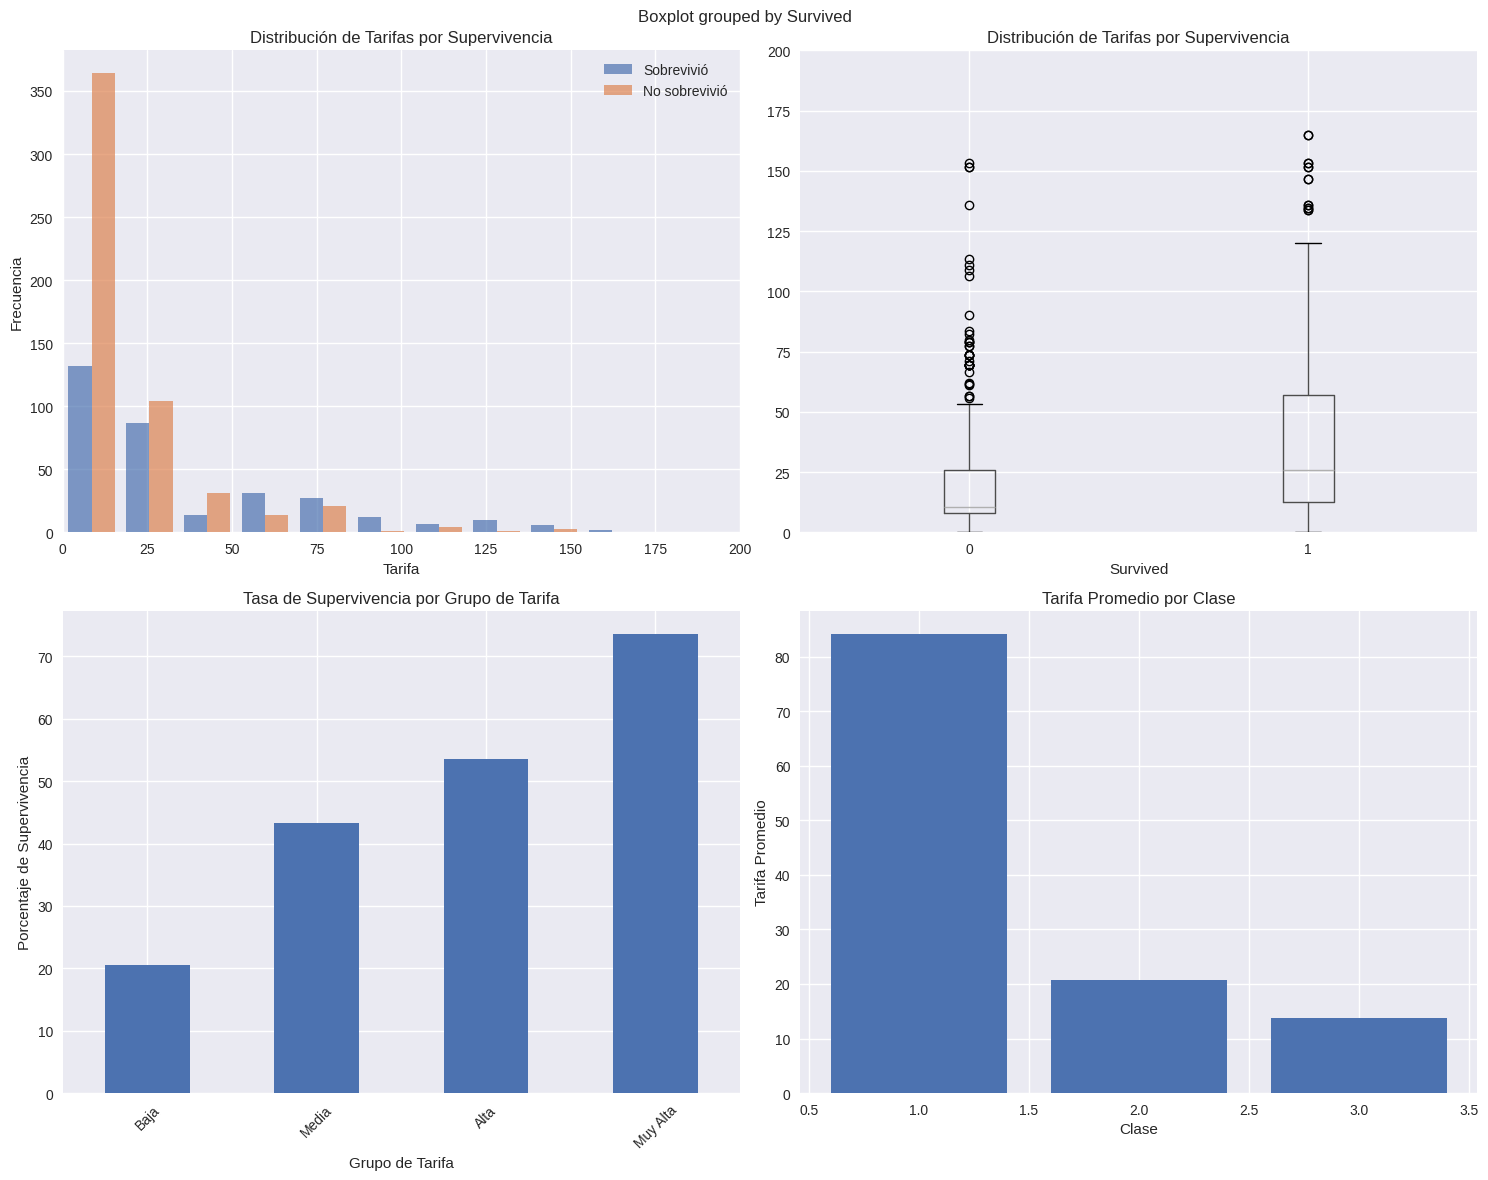

In [ ]:
# ANÁLISIS DE TARIFA (FARE)
print("=== ANÁLISIS DE TARIFA ===")

# Crear grupos de tarifa
df['Fare_Group'] = pd.cut(df['Fare'],
                         bins=[0, 10, 30, 100, 1000],
                         labels=['Baja', 'Media', 'Alta', 'Muy Alta'])

fare_survival = df.groupby('Fare_Group')['Survived'].agg(['count', 'sum', 'mean'])
fare_survival['percentage'] = fare_survival['mean'] * 100

print("Supervivencia por grupo de tarifa:")
print(fare_survival)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribución de tarifas por supervivencia
survived_fare = df[df['Survived'] == 1]['Fare'].dropna()
not_survived_fare = df[df['Survived'] == 0]['Fare'].dropna()

axes[0,0].hist([survived_fare, not_survived_fare], bins=30, label=['Sobrevivió', 'No sobrevivió'], alpha=0.7)
axes[0,0].set_title('Distribución de Tarifas por Supervivencia')
axes[0,0].set_xlabel('Tarifa')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].legend()
axes[0,0].set_xlim(0, 200)  # Limitar para mejor visualización

# Box plot de tarifa por supervivencia
df.boxplot(column='Fare', by='Survived', ax=axes[0,1])
axes[0,1].set_title('Distribución de Tarifas por Supervivencia')
axes[0,1].set_ylim(0, 200)

# Supervivencia por grupo de tarifa
fare_survival['percentage'].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Tasa de Supervivencia por Grupo de Tarifa')
axes[1,0].set_xlabel('Grupo de Tarifa')
axes[1,0].set_ylabel('Porcentaje de Supervivencia')
axes[1,0].tick_params(axis='x', rotation=45)

# Tarifa promedio por clase
fare_by_class = df.groupby('Pclass')['Fare'].mean()
axes[1,1].bar(fare_by_class.index, fare_by_class.values)
axes[1,1].set_title('Tarifa Promedio por Clase')
axes[1,1].set_xlabel('Clase')
axes[1,1].set_ylabel('Tarifa Promedio')

plt.tight_layout()
plt.show()

=== ANÁLISIS DE TAMAÑO DE FAMILIA ===
Supervivencia por tamaño de familia:
             count  sum      mean  percentage
Family_Size                                  
1              537  163  0.303538   30.353818
2              161   89  0.552795   55.279503
3              102   59  0.578431   57.843137
4               29   21  0.724138   72.413793
5               15    3  0.200000   20.000000
6               22    3  0.136364   13.636364
7               12    4  0.333333   33.333333
8                6    0  0.000000    0.000000
11               7    0  0.000000    0.000000


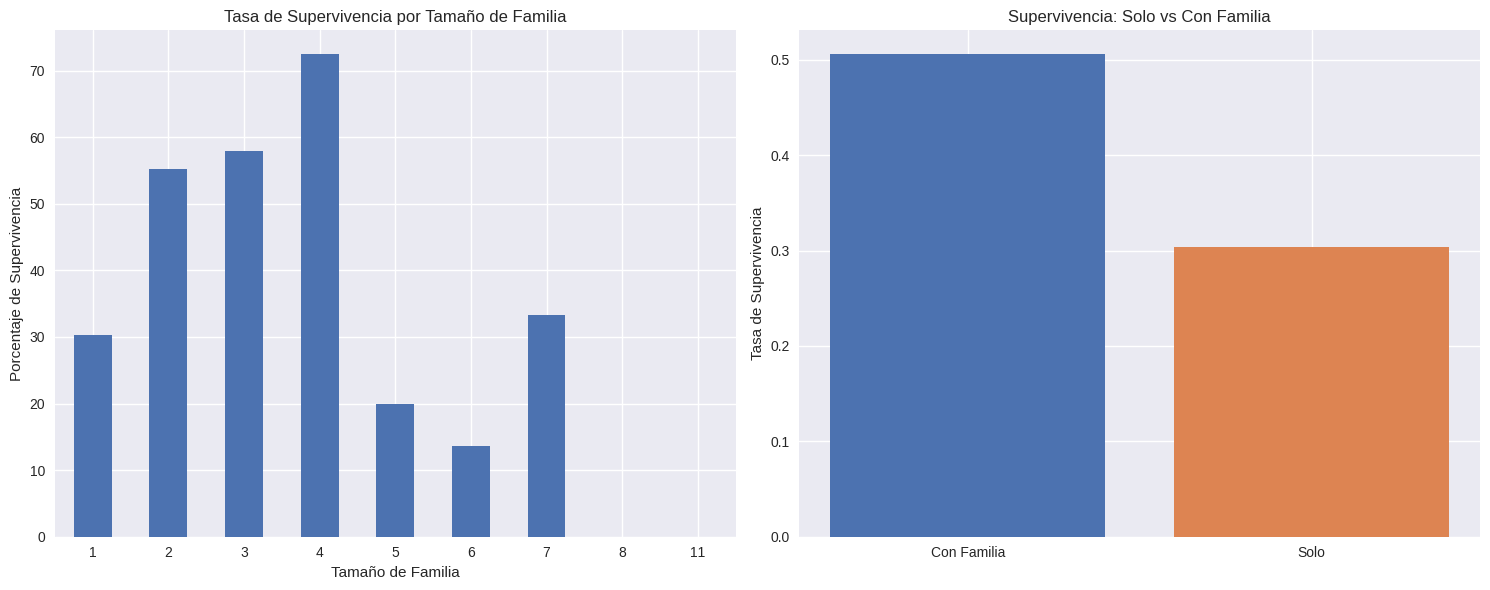

In [ ]:
# ANÁLISIS DE FAMILIA
print("=== ANÁLISIS DE TAMAÑO DE FAMILIA ===")

family_survival = df.groupby('Family_Size')['Survived'].agg(['count', 'sum', 'mean'])
family_survival['percentage'] = family_survival['mean'] * 100

print("Supervivencia por tamaño de familia:")
print(family_survival)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Supervivencia por tamaño de familia
family_survival['percentage'].plot(kind='bar', ax=axes[0])
axes[0].set_title('Tasa de Supervivencia por Tamaño de Familia')
axes[0].set_xlabel('Tamaño de Familia')
axes[0].set_ylabel('Porcentaje de Supervivencia')
axes[0].tick_params(axis='x', rotation=0)

# Comparación entre viajar solo vs acompañado
alone_survival = df.groupby('Is_Alone')['Survived'].mean()
alone_labels = ['Con Familia', 'Solo']
axes[1].bar(alone_labels, alone_survival, color=palette[:2])
axes[1].set_title('Supervivencia: Solo vs Con Familia')
axes[1].set_ylabel('Tasa de Supervivencia')

plt.tight_layout()
plt.show()

=== ANÁLISIS DE TÍTULOS ===
Supervivencia por título:
        count  sum      mean  percentage
Title                                   
Mrs       126  100  0.793651   79.365079
Miss      185  130  0.702703   70.270270
Master     40   23  0.575000   57.500000
Rare       23    8  0.347826   34.782609
Mr        517   81  0.156673   15.667311


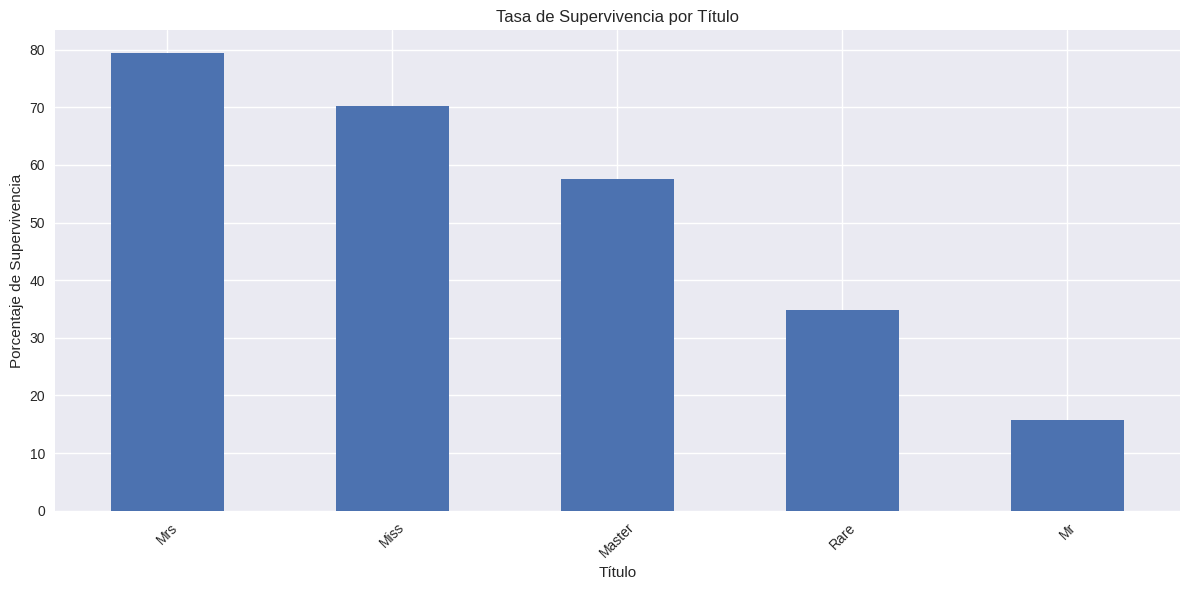

In [ ]:
# ANÁLISIS DE TÍTULOS
print("=== ANÁLISIS DE TÍTULOS ===")

title_survival = df.groupby('Title')['Survived'].agg(['count', 'sum', 'mean'])
title_survival['percentage'] = title_survival['mean'] * 100
title_survival = title_survival.sort_values('percentage', ascending=False)

print("Supervivencia por título:")
print(title_survival)

plt.figure(figsize=(12, 6))
title_survival['percentage'].plot(kind='bar')
plt.title('Tasa de Supervivencia por Título')
plt.xlabel('Título')
plt.ylabel('Porcentaje de Supervivencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# PRUEBAS DE INDEPENDENCIA (CHI-CUADRADO)
print("=== PRUEBAS DE INDEPENDENCIA ===")

categorical_vars = ['Pclass', 'Sex', 'Embarked', 'Age_Group']

for var in categorical_vars:
    if var in df.columns:
        # Crear tabla de contingencia
        contingency_table = pd.crosstab(df[var], df['Survived'])

        # Realizar prueba chi-cuadrado
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        print(f"\nPrueba Chi-cuadrado para {var}:")
        print(f"Chi-cuadrado: {chi2:.4f}")
        print(f"p-valor: {p_value:.4f}")
        print(f"Grados de libertad: {dof}")

        if p_value < 0.05:
            print("✓ Existe relación significativa con la supervivencia")
        else:
            print("✗ No existe relación significativa con la supervivencia")

=== PRUEBAS DE INDEPENDENCIA ===

Prueba Chi-cuadrado para Pclass:
Chi-cuadrado: 102.8890
p-valor: 0.0000
Grados de libertad: 2
✓ Existe relación significativa con la supervivencia

Prueba Chi-cuadrado para Sex:
Chi-cuadrado: 260.7170
p-valor: 0.0000
Grados de libertad: 1
✓ Existe relación significativa con la supervivencia

Prueba Chi-cuadrado para Embarked:
Chi-cuadrado: 26.4891
p-valor: 0.0000
Grados de libertad: 2
✓ Existe relación significativa con la supervivencia

Prueba Chi-cuadrado para Age_Group:
Chi-cuadrado: 12.5300
p-valor: 0.0138
Grados de libertad: 4
✓ Existe relación significativa con la supervivencia


### 1.5 Análisis de Valores Faltantes

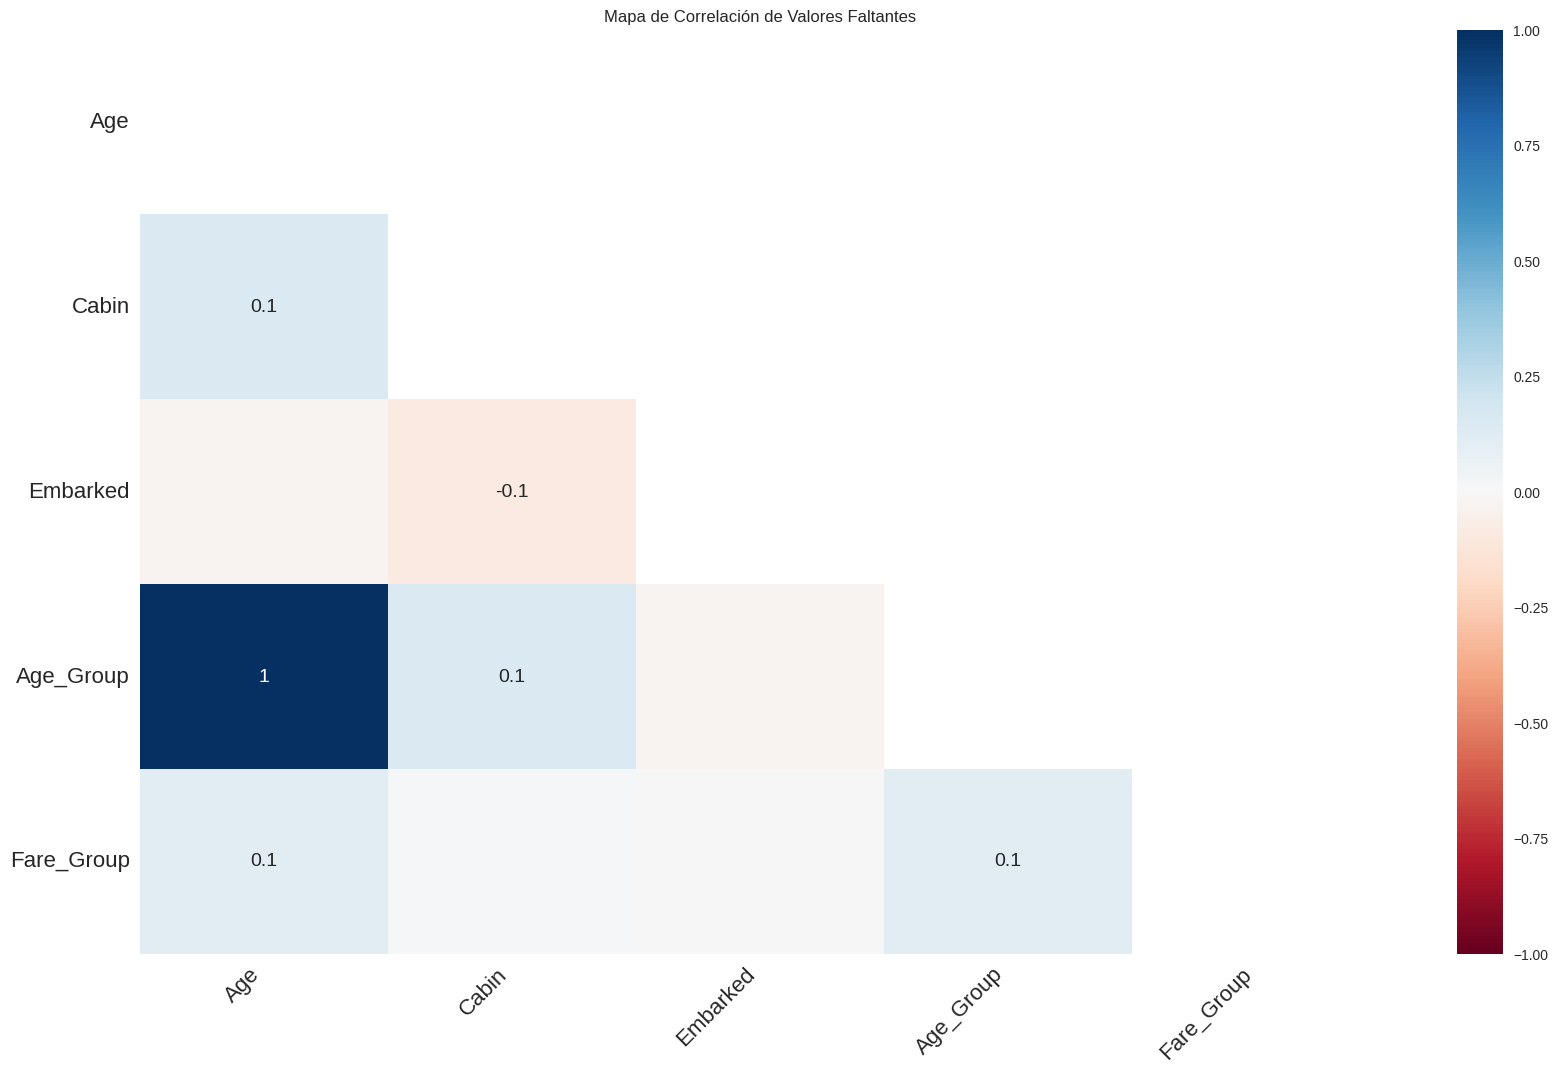

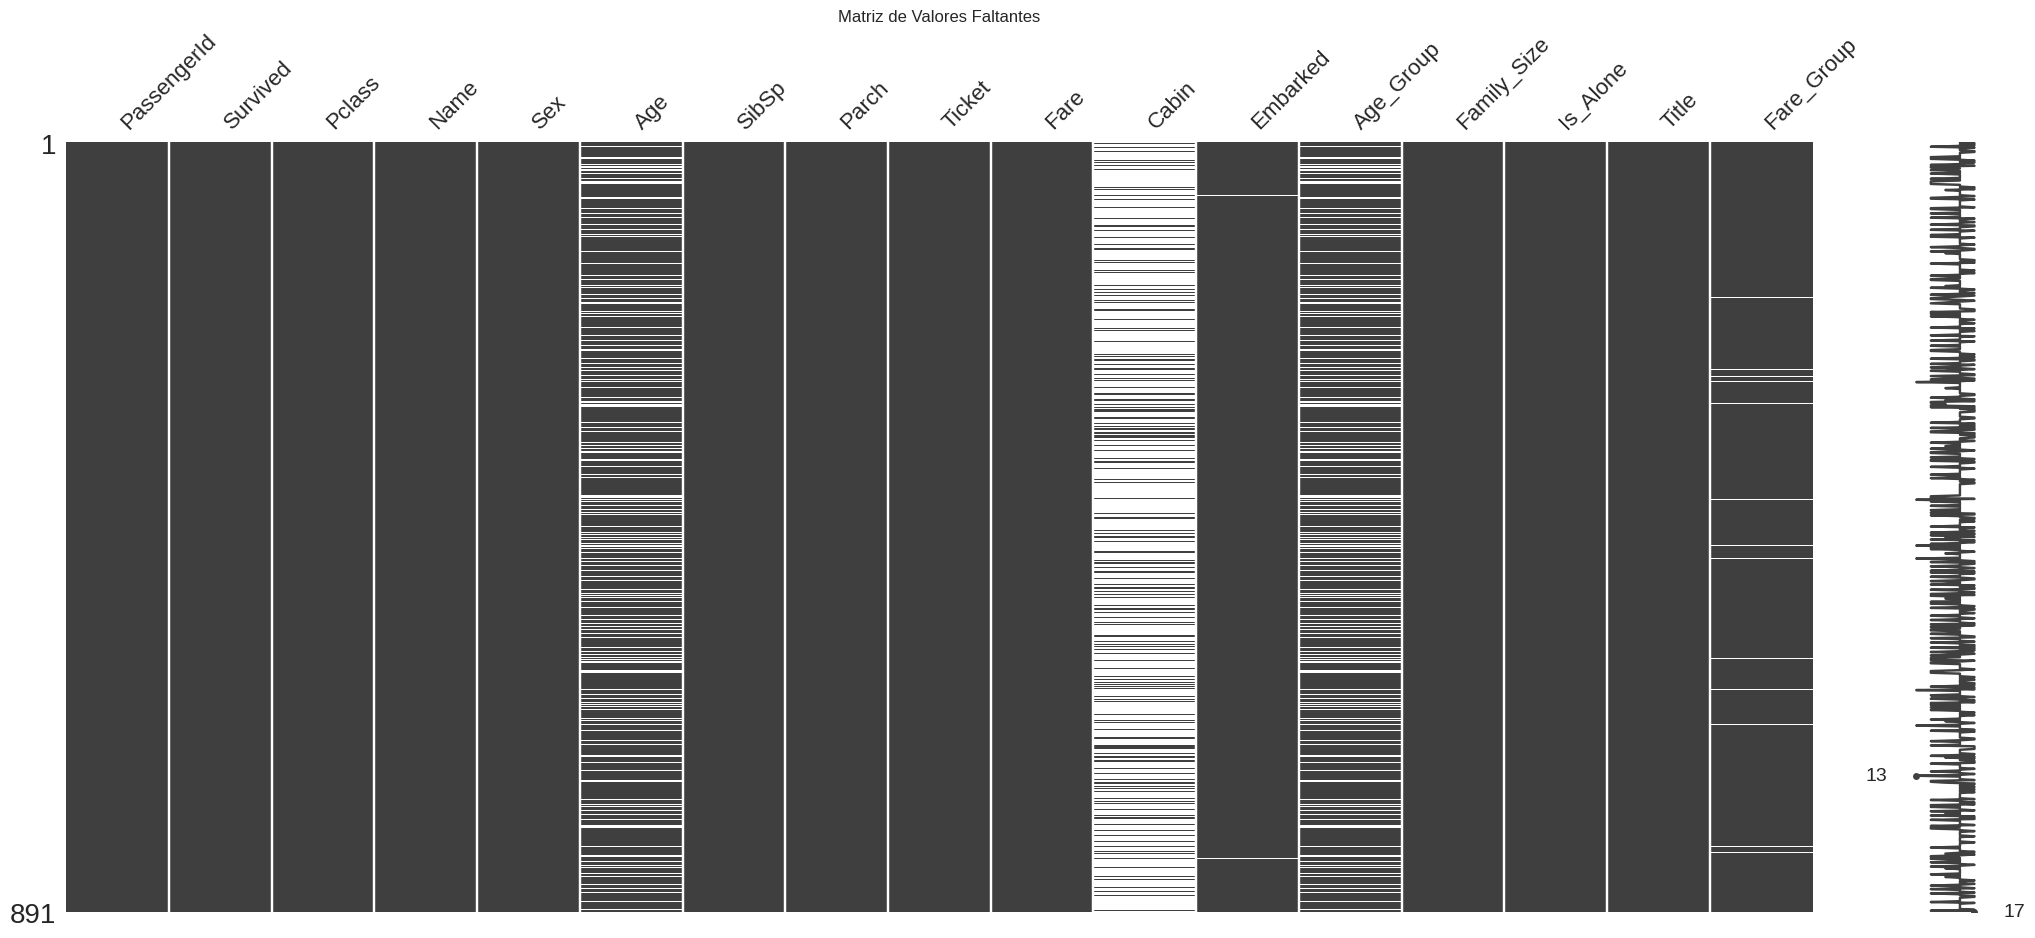

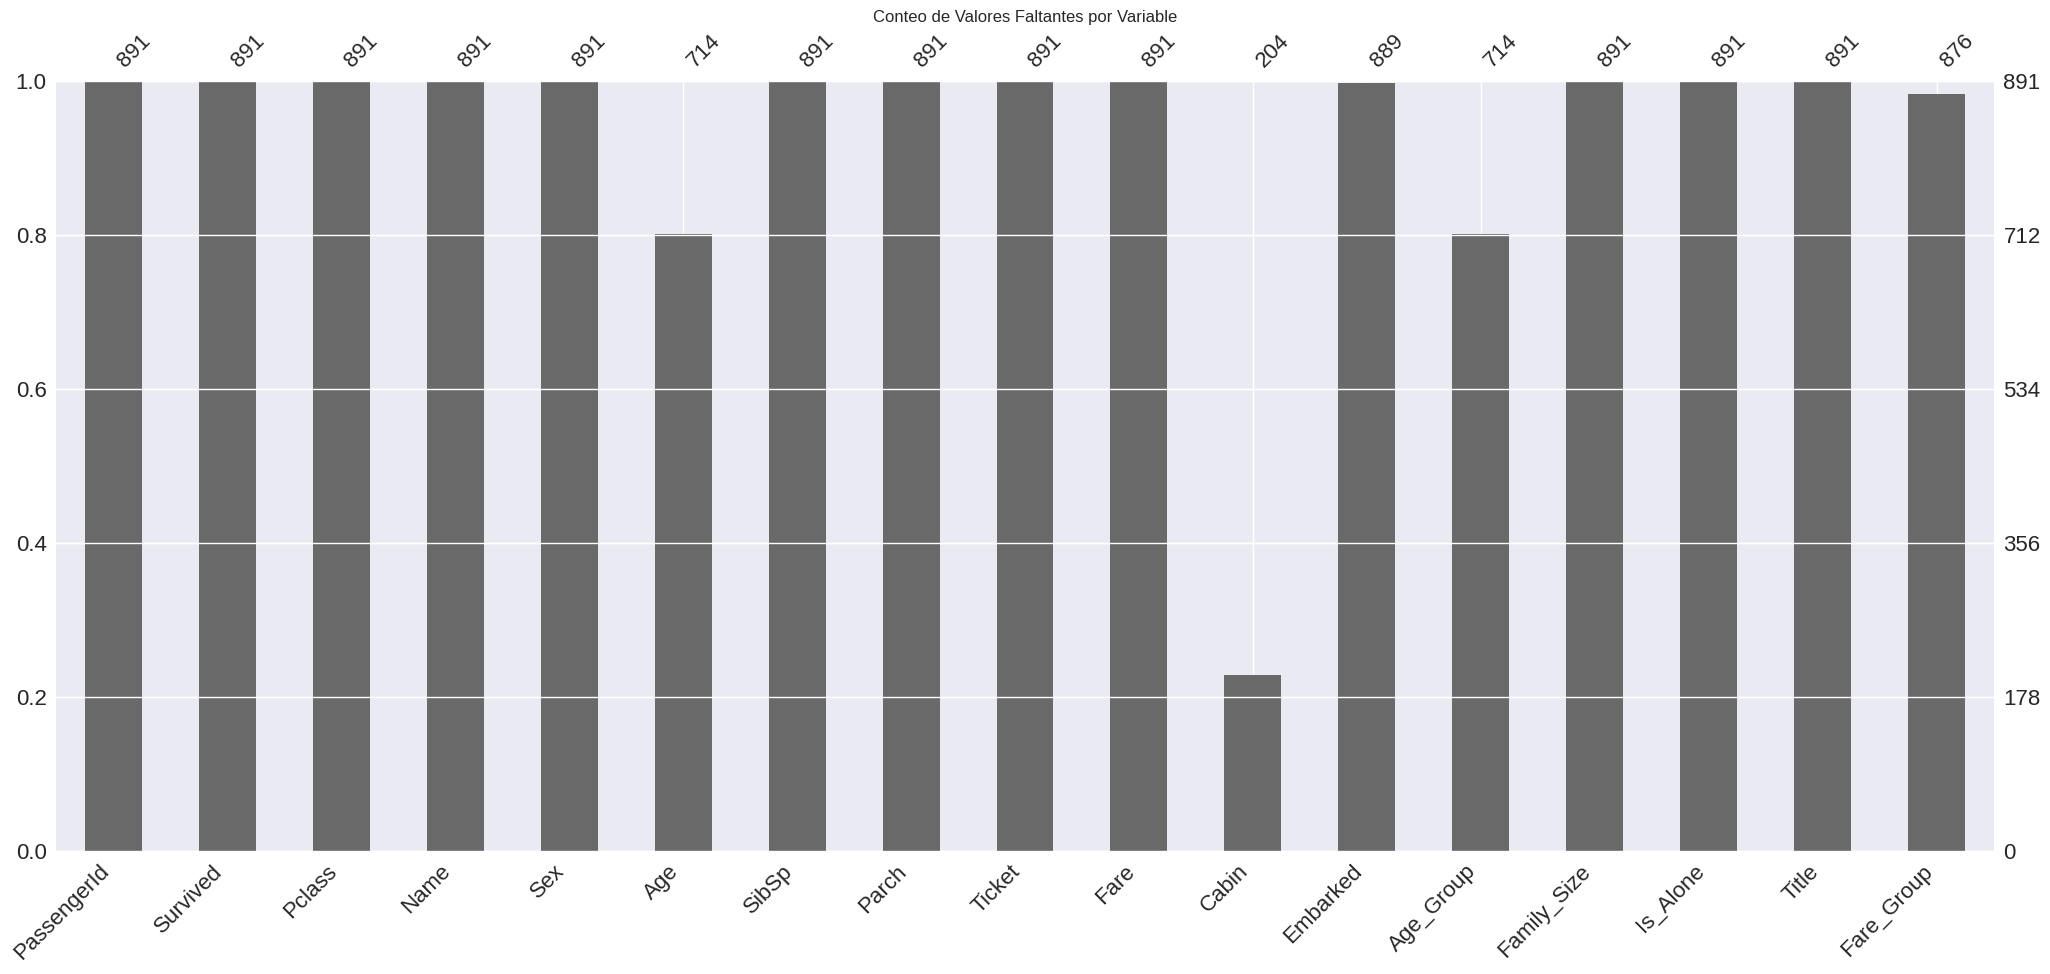

Pclass
1    0.138889
2    0.059783
3    0.276986
Name: Age_missing, dtype: float64
Sex
female    0.168790
male      0.214905
Name: Age_missing, dtype: float64
p-value para Age vs Pclass: 0.0000


In [ ]:
# Mapa de calor de correlación entre valores faltantes
msno.heatmap(df)
plt.title('Mapa de Correlación de Valores Faltantes')
plt.show()

# Matriz de ausencia
msno.matrix(df)
plt.title('Matriz de Valores Faltantes')
plt.show()

# Diagrama de barras
msno.bar(df)
plt.title('Conteo de Valores Faltantes por Variable')
plt.show()

# Crear variable binaria para valores faltantes en Age
df['Age_missing'] = df['Age'].isnull().astype(int)

# Ver si la ausencia de Age depende de Pclass o Sex
print(df.groupby('Pclass')['Age_missing'].mean())
print(df.groupby('Sex')['Age_missing'].mean())

# Prueba estadística
contingency = pd.crosstab(df['Age_missing'], df['Pclass'])
chi2, p, _, _ = chi2_contingency(contingency)
print(f"p-value para Age vs Pclass: {p:.4f}")

Este análisis confirma que los valores del campo Age no es completamente aleatorios y pueden ser sistemáticos ya que varian significativamente entre clases y géneros.

Se revela que los pasajeros de tercera clase, tienen casi el doble de valores faltantes que los de primera clase.

### Conclusiones

In [ ]:
# RESUMEN EJECUTIVO
print("=== RESUMEN EJECUTIVO ===")
print("\n📊 HALLAZGOS PRINCIPALES:")
print("\n1. SUPERVIVENCIA GENERAL:")
print(f"   - Tasa general de supervivencia: {df['Survived'].mean():.1%}")

print("\n2. POR CLASE SOCIAL:")
for i in [1, 2, 3]:
    rate = df[df['Pclass'] == i]['Survived'].mean()
    print(f"   - Clase {i}: {rate:.1%}")

print("\n3. POR GÉNERO:")
for gender in ['female', 'male']:
    rate = df[df['Sex'] == gender]['Survived'].mean()
    print(f"   - {gender.capitalize()}: {rate:.1%}")

print("\n4. FACTORES MÁS CORRELACIONADOS CON SUPERVIVENCIA:")
survival_corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Is_Alone']].corr()['Survived'].abs().sort_values(ascending=False)
for var, corr in survival_corr[1:4].items():
    print(f"   - {var}: {corr:.3f}")

print("\n5. INSIGHTS CLAVE:")
print("   - Las mujeres tuvieron 4x más probabilidad de sobrevivir que los hombres")
print("   - La clase social fue determinante: 1ra clase tuvo 2x más supervivencia que 3ra")
print("   - Los niños tuvieron mayor tasa de supervivencia")
print("   - Tamaño de familia pequeño/mediano favorecía la supervivencia")
print("   - Mayor tarifa pagada se correlacionó con mayor supervivencia")

=== RESUMEN EJECUTIVO ===

📊 HALLAZGOS PRINCIPALES:

1. SUPERVIVENCIA GENERAL:
   - Tasa general de supervivencia: 38.4%

2. POR CLASE SOCIAL:
   - Clase 1: 63.0%
   - Clase 2: 47.3%
   - Clase 3: 24.2%

3. POR GÉNERO:
   - Female: 74.2%
   - Male: 18.9%

4. FACTORES MÁS CORRELACIONADOS CON SUPERVIVENCIA:
   - Pclass: 0.338
   - Fare: 0.257
   - Is_Alone: 0.203

5. INSIGHTS CLAVE:
   - Las mujeres tuvieron 4x más probabilidad de sobrevivir que los hombres
   - La clase social fue determinante: 1ra clase tuvo 2x más supervivencia que 3ra
   - Los niños tuvieron mayor tasa de supervivencia
   - Tamaño de familia pequeño/mediano favorecía la supervivencia
   - Mayor tarifa pagada se correlacionó con mayor supervivencia
